# INTRODUCCION

In [93]:
'''
La empresa TELECOM X enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.
El desafío es recopilar, procesar y analizar los datos.
A partir del análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.
'''

'\nLa empresa TELECOM X enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.\nEl desafío es recopilar, procesar y analizar los datos. \nA partir del análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.\n'

# LIMPIEZA Y TRATAMIENTO DE DATOS

In [94]:
#Importamos los datos json con la biblioteca Pandas

In [95]:
import pandas as pd
datos=pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [96]:
datos.shape

(7267, 6)

In [97]:
#Observamos que tiene 6 columnas y 7267 filas de informacion que nesesita ser expandida para que sea mas facil de entender

In [98]:
#Usamos el metodo json_normalize de pandas para poder expandir cada columna y luego lo vamos a unir en un solo DataFrame
customer=pd.json_normalize(datos['customer'])
phone=pd.json_normalize(datos['phone'])
internet=pd.json_normalize(datos['internet'])
account=pd.json_normalize(datos['account'])

In [99]:
#Unimos las columnas expandidas en una sola Tabla
datos_unidos=pd.concat([df, customer, phone, internet, account], axis=1)
datos_unidos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [100]:
#Observamos que ahora tenemos 21 columnas y 7267 registros, los cuales nesesitamos ver que tipos de datos contiene

In [101]:
datos_unidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [102]:
#Vamos a observar con mas detalle que datos contiene cada columna, con el metodo unique

In [103]:
for columna in datos_unidos.columns:
  print(columna)
  print(datos_unidos[columna].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['Yes' 'No']
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['Yes' 'No' 'No internet service']
StreamingTV
['Yes' 'No' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['One year' 'Month-to-month' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automati

# TRANSFORMACION

In [104]:
#Observamos que se nesesita limpiar o corregir la columna Churn que posee valores '' y la columna Charges_Total que aparece como object debido a que contiene valores ' '
#Los valores de Churn que tienen '' será cambiado por 'No se sabe'
# Los valores de Charges_Total que tienen '' será cambiado por valores iguales a 'Charges.Monthly' de ese registro, y finalmente será cambiado a columna flotante

In [105]:
mask = datos_unidos['Churn'] == ''
datos_unidos.loc[mask, 'Churn'] = 'No se sabe'
datos_unidos['Churn'].unique()

array(['No', 'Yes', 'No se sabe'], dtype=object)

In [106]:
datos_unidos['Charges.Total'] = datos_unidos['Charges.Total'].str.strip()
mask = datos_unidos['Charges.Total'] == ''
datos_unidos.loc[mask, 'Charges.Total'] = datos_unidos.loc[mask, 'Charges.Monthly']

In [107]:
import numpy as np
datos_unidos['Charges.Total']=datos_unidos['Charges.Total'].astype(np.float64)
datos_unidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [108]:
#Verifiamos si tenemos valores vacios o duplicados en cada columna o registro

In [109]:
datos_unidos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [110]:
duplicados = datos_unidos[datos_unidos.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [111]:
datos_unidos['customerID'].nunique()

7267

In [112]:
#Creamos una nueva columna llamada Cuentas_Diarias para ver la distribucion diaria del monto de cada cliente

In [113]:
datos_unidos['Cuentas_Diarias']=datos_unidos['Charges.Monthly']/30
datos_unidos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [114]:
#Vamos a cambiar el nombre de algunas columnas para hacer mas facil la comprension y el análisis del problema

In [115]:
# Cambiar de nombres de columnas
datos_unidos.rename(columns={'Churn':'Desercion', 'tenure': 'Antiguedad','PaperlessBilling':'Facturacion_electronica','Charges.Monthly': 'Cuentas_Mensual', 'Charges.Total': 'Cuentas_Total'}, inplace=True)
datos_unidos.head()

,customerID,Desercion,gender,SeniorCitizen,Partner,Dependents,Antiguedad,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Facturacion_electronica,PaymentMethod,Cuentas_Mensual,Cuentas_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


# ANALISIS EXPLORATORIO DE DATOS

In [116]:
#Teniendo lista la base de datos para el analisis, vamos a hacer una revision estadistica general de las columnas numéricas

In [117]:
datos_unidos.describe()

,SeniorCitizen,Antiguedad,Cuentas_Mensual,Cuentas_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.244730,2.157337
std,0.369074,24.571773,30.129572,2268.586391,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [118]:
#Observamos que La antiguedad varia desde 0 a 72, lo cual puede ser en meses, el pago o consumo mensual de los clientes varia de 18.25 a 118.75

In [119]:
#Vamos a graficar la Desercion para ver como se distribuye, se hará con el metodo value_counts y matplotlib

In [120]:
cliente_perdido=datos_unidos['Desercion'].value_counts()
cliente_perdido

,count
Desercion,
No,5174
Yes,1869
No se sabe,224


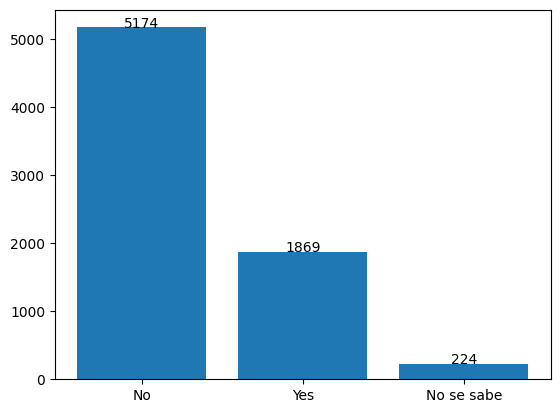

In [121]:
import matplotlib.pyplot as plt
plt.bar(cliente_perdido.index, cliente_perdido.values)

for i, valor in enumerate(cliente_perdido.values):
    plt.text(i, valor, str(round(valor, 2)), ha='center')

plt.show()

In [122]:
#Observamos que hay 1869 Deserciones registradas en la base de datos y 224 que no se tiene concomiento

In [123]:
#Vamos a graficar como se relacion la Desercion con otras columnas categoricas de la base de datos, mediante countplot de seaborn

In [124]:
#Opcionalmente podemos cambiar los datos de 'Yes', 'No', hacia 1, 0. Pero por conveniencia en las graficas no lo haremos
#datos_unidos['Desercion'] = datos_unidos['Desercion'].replace({'No': 0, 'Yes': 1, 'No se sabe': 2})

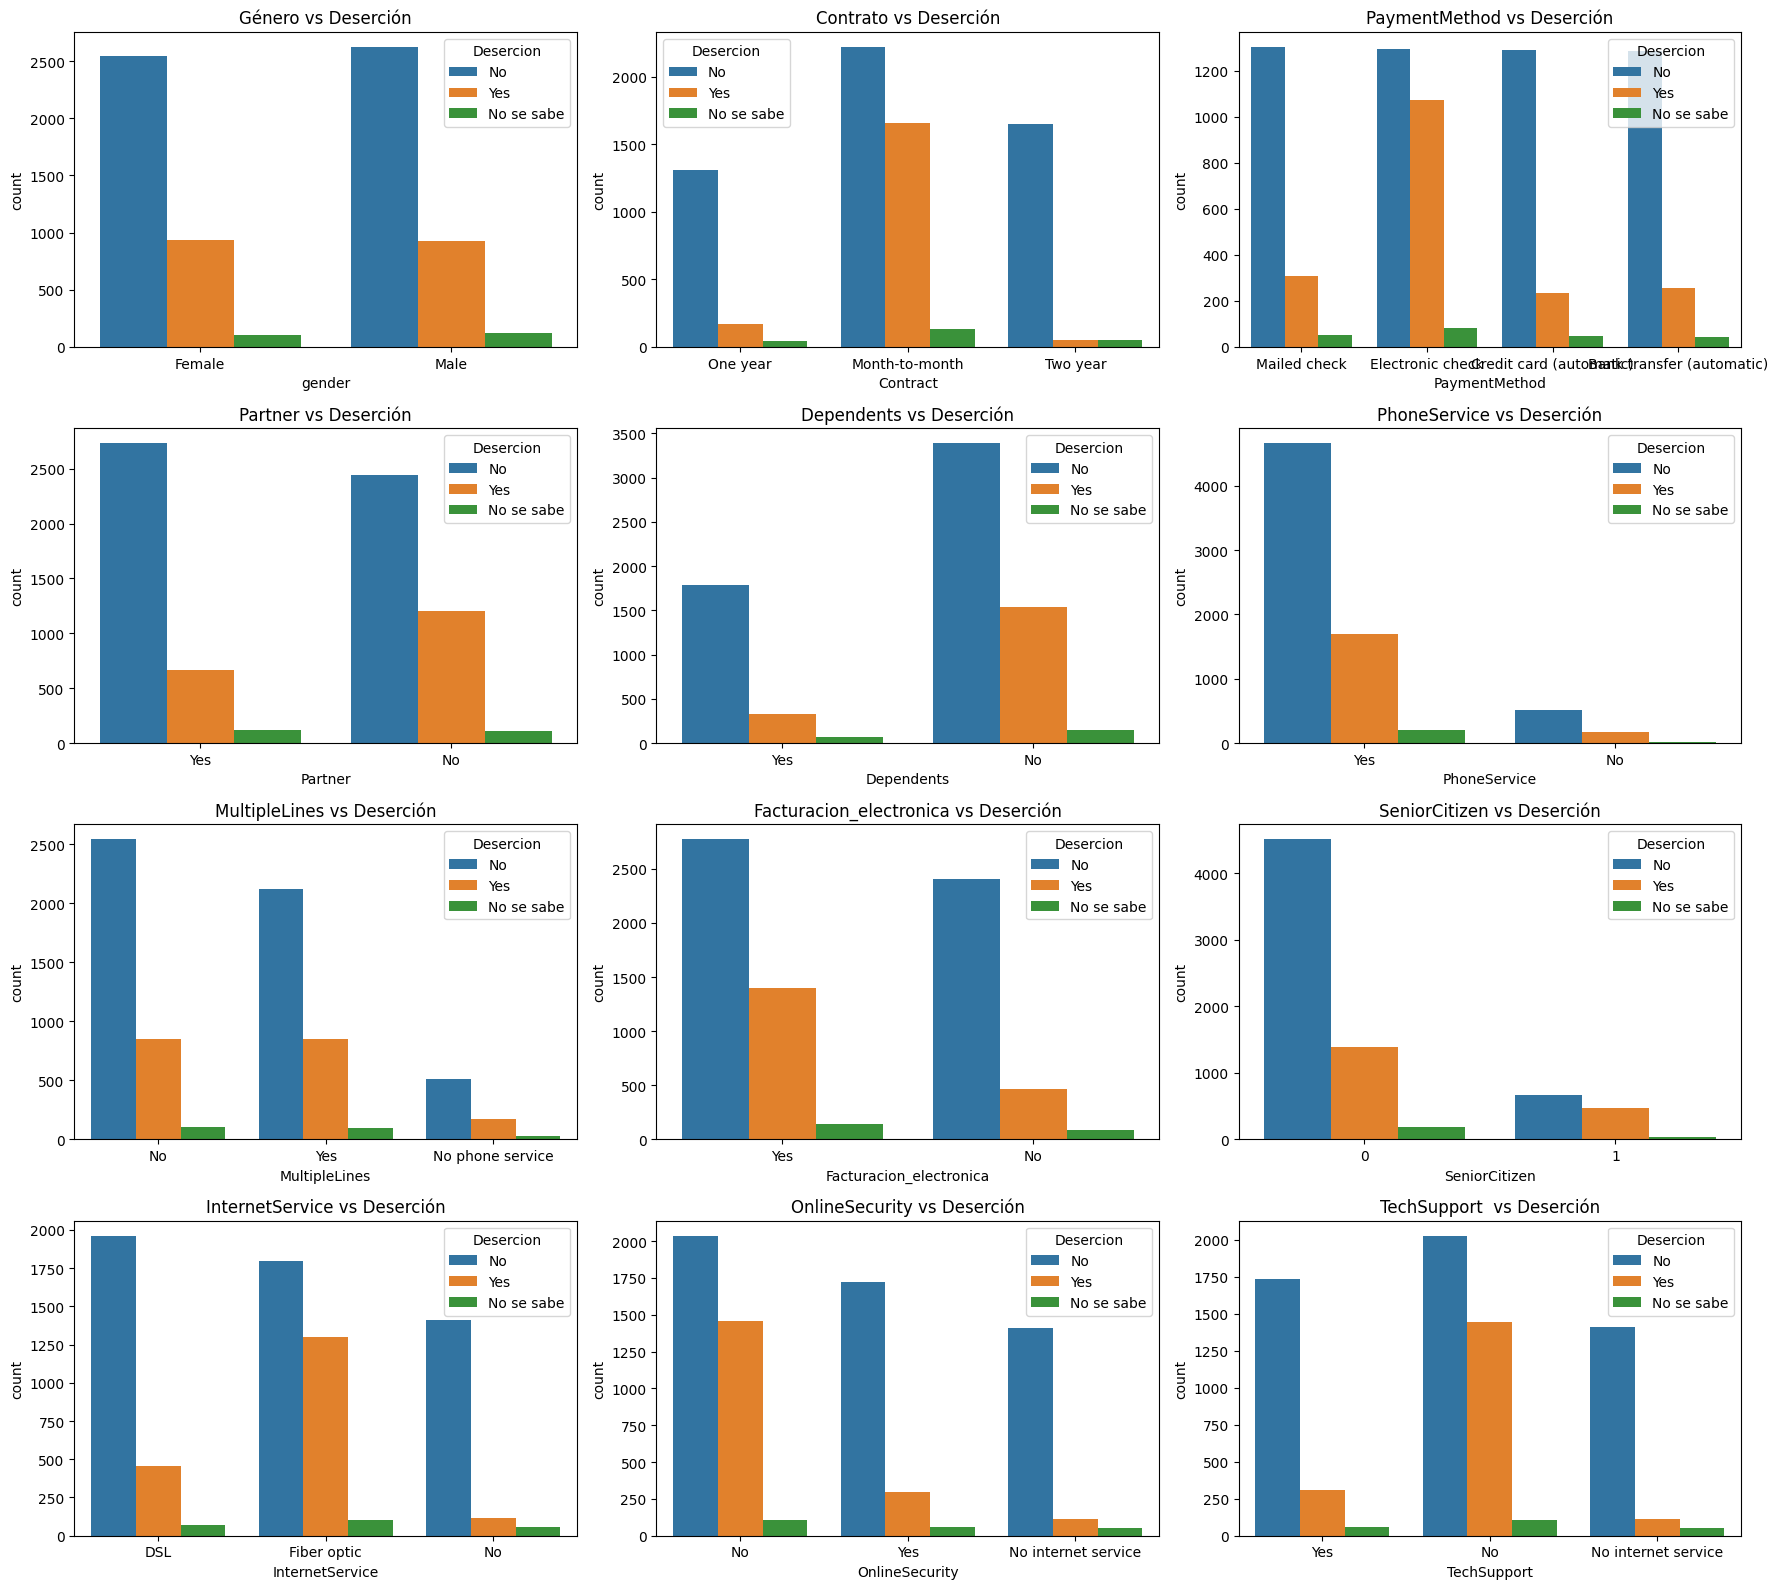

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 3, figsize=(18, 16))

sns.countplot(x='gender', hue='Desercion', data=datos_unidos, ax=axes[0,0])
axes[0, 0].set_title('Género vs Deserción')

sns.countplot(x='Contract', hue='Desercion', data=datos_unidos, ax=axes[0,1])
axes[0,1].set_title('Contrato vs Deserción')

sns.countplot(x='PaymentMethod', hue='Desercion', data=datos_unidos, ax=axes[0,2])
axes[0,2].set_title('PaymentMethod vs Deserción')

sns.countplot(x='Partner', hue='Desercion', data=datos_unidos, ax=axes[1,0])
axes[1,0].set_title('Partner vs Deserción')

sns.countplot(x='Dependents', hue='Desercion', data=datos_unidos, ax=axes[1,1])
axes[1,1].set_title('Dependents vs Deserción')

sns.countplot(x='PhoneService', hue='Desercion', data=datos_unidos, ax=axes[1,2])
axes[1,2].set_title('PhoneService vs Deserción')

sns.countplot(x='MultipleLines', hue='Desercion', data=datos_unidos, ax=axes[2,0])
axes[2,0].set_title('MultipleLines vs Deserción')

sns.countplot(x='Facturacion_electronica', hue='Desercion', data=datos_unidos, ax=axes[2,1])
axes[2,1].set_title('Facturacion_electronica vs Deserción')

sns.countplot(x='SeniorCitizen', hue='Desercion', data=datos_unidos, ax=axes[2,2])
axes[2,2].set_title('SeniorCitizen vs Deserción')

sns.countplot(x='InternetService', hue='Desercion', data=datos_unidos, ax=axes[3,0])
axes[3,0].set_title('InternetService vs Deserción')

sns.countplot(x='OnlineSecurity', hue='Desercion', data=datos_unidos, ax=axes[3,1])
axes[3,1].set_title('OnlineSecurity vs Deserción')

#OnlineBackup  DeviceProtection   TechSupport
sns.countplot(x='TechSupport', hue='Desercion', data=datos_unidos, ax=axes[3,2])
axes[3,2].set_title('TechSupport  vs Deserción')

plt.tight_layout()
plt.show()

In [126]:
#A partir de las graficas se puede realizar el siguiente análisis:

**Los que mayor deserción presentaron fueron:**


*   Los que tuvieron un contrato mes a mes

*   Los que no tenían seguridad online
*   Los que no tenían seguridad online
*   Los que no tenían onlinebackup
*   Los que no tenían protección de dispositivo

*   Los que pagaban con un cheque electrónico
*   Los que tenían internet de fibra óptica
*   Los que tenían servicio de telefonía
*   Los que tenían facturación electrónica

*   Los que no tenían dependientes (hijos, etc.)
*   Los que no eran personas de tercera edad

*   Los que no tenían soporte tecnico

In [127]:
#Tambien, vamos a ver como se relaciona la Desercion con variables numéricas, mediante boxplot de seaborn

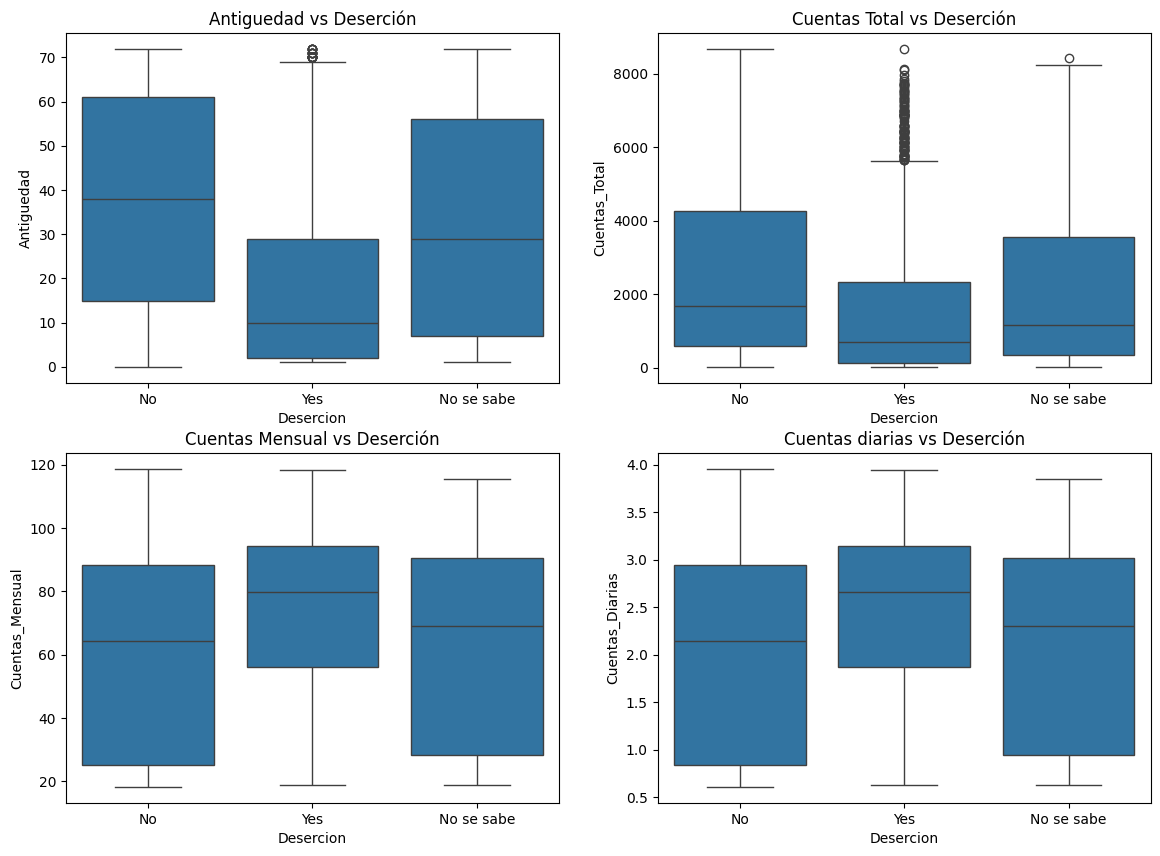

In [128]:
#graficar las variables numericas, como "Antiguedad", "Pago_Total", "Pago_Mensual"  y "Pago_Diario" con la "Dersecion"
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x='Desercion', y='Antiguedad', data=datos_unidos, ax=axes[0,0])
axes[0,0].set_title('Antiguedad vs Deserción')

sns.boxplot(x='Desercion', y='Cuentas_Total', data=datos_unidos, ax=axes[0,1])
axes[0,1].set_title('Cuentas Total vs Deserción')

sns.boxplot(x='Desercion', y='Cuentas_Mensual', data=datos_unidos, ax=axes[1,0])
axes[1,0].set_title('Cuentas Mensual vs Deserción')

sns.boxplot(x='Desercion', y='Cuentas_Diarias', data=datos_unidos, ax=axes[1,1])
axes[1,1].set_title('Cuentas diarias vs Deserción')

plt.show()

**Los que mayor deserción presentaron fueron:**


*   Los que tenían menor antigüedad
*   Los que contratan mas servicios mensualmente (mayor a 60 Cuentas) y en su totalidad (incluso Cuentas mayores a 5000)



# CONCLUSIONES E INSIGHTS

In [129]:
#La conclusion de quienes son los clientes desertores y cual podria ser la causa es la siguiente:

Los clientes desertores son personas independientes (hombres y mujeres), jóvenes, contrataban servicios a mayores cantidades mensualmente y en su totalidad, pagaban con cheques electrónicos por medio de internet y recibían facturas electrónicas.

No recibían soporte técnico, por lo que posiblemente este fue la causante de la deserción de los clientes debido a que muchos no contaban con seguros online, copia de seguridad en linea o protección de dispositivos por lo que no se sentían seguros al comprar, lo que se refleja en que muchos tenían contratos mensuales.  

# RECOMENDACIONES

In [130]:
#La sugerencia para reducir la evasion es la siguiente:

En vista que el servicio de soporte tecnico puede ser clave en este problema, se sugiere dar mas prioridad a resolver problemas y consultas de clientes jovenes independientes para reducir la evasión.
El equipo de DataScience puede asegurar con mayor analisis este resultado y ademas, podria predecir cuanta reduccion habrá si se aplica alguna medida